In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split

In [2]:
#load datasets
X, y = ds.load_svmlight_file('data/housing_scale')
X = X.todense()

In [3]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 13), (354,), (152, 13), (152,))

In [4]:
#param init:all zeros
def zeroInit():
    return np.zeros(X_train.shape[1])

# define l2 loss
def L2loss(y_true, y_pred):
    return 1/2 * np.sum(np.square((y_true - y_pred)))

#evaluation metric
def mse(y_true, y_pred):
    return np.sum(np.square((y_true - y_pred)))/len(y_true)

#cal gradient
def gradient(X, y, w):
    return -np.dot(X.T, y) + np.dot(np.dot(X.T, X), w)

In [28]:
#initialize w
w = zeroInit()

learning_rate = 0.001
iter_num = 200

#store losses
train_loss_history = []
test_loss_history = []
train_metric_history = []
test_metric_history = []

#start training process
for i in range(iter_num):
    train_loss = L2loss(y_train, np.dot(X_train, w))
    train_loss_history.append(train_loss)
    test_loss = L2loss(y_test, np.dot(X_test, w))
    test_loss_history.append(test_loss)

    train_metric = mse(y_train, np.dot(X_train, w))
    train_metric_history.append(train_metric)
    test_metric = mse(y_test, np.dot(X_test, w))
    test_metric_history.append(test_metric)
    
    print('iter ' + str(i) + ':', train_loss, test_loss, test_metric)
#     print('train L2loss', L2loss(y_train, np.dot(X_train, w)))
#     print('test L2loss', L2loss(y_test, np.dot(X_test, w)))
    w -= learning_rate * gradient(X_train, y_train, w)

iter 0: 109319.53 40493.64 532.811052632
iter 1: 27284.4653934 12382.099428 162.922360894
iter 2: 14593.8939414 4928.80419109 64.8526867249
iter 3: 11890.0075405 4722.61099822 62.1396183976
iter 4: 10732.7814391 4079.96212304 53.6837121452
iter 5: 9904.84419012 3930.64755359 51.7190467577
iter 6: 9216.8223635 3692.26165769 48.5823902328
iter 7: 8627.94172936 3528.65099673 46.4296183781
iter 8: 8120.70218261 3372.00536037 44.3684915839
iter 9: 7682.71035462 3240.98515223 42.6445414767
iter 10: 7303.80856929 3124.9794768 41.1181510105
iter 11: 6975.42911469 3024.32217263 39.7937127978
iter 12: 6690.30409862 2935.9838057 38.6313658644
iter 13: 6442.25767585 2858.5449173 37.6124331224
iter 14: 6226.03641006 2790.38150971 36.7155461804
iter 15: 6037.16717339 2730.25260201 35.9243763423
iter 16: 5871.83751776 2677.04681787 35.2243002351
iter 17: 5726.79482732 2629.83239605 34.6030578428
iter 18: 5599.26123989 2587.80580004 34.0500763163
iter 19: 5486.86182484 2550.28122473 33.5563319043
iter

In [26]:
print('best metric score: ', test_metric_history[-1])

best metric score:  26.1400931477


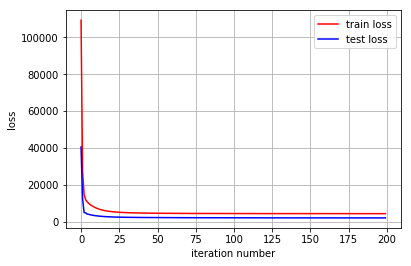

In [27]:
#plotting loss
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('iteration number')
plt.ylabel('loss')
plt.plot(range(iter_num), train_loss_history,'r', label='train loss')  
plt.plot(range(iter_num), test_loss_history,'b',label='test loss')  
plt.legend()
plt.grid()
plt.show()

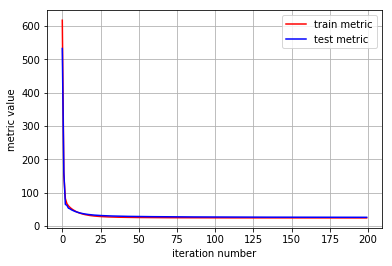

In [30]:
#plotting metric
plt.xlabel('iteration number')
plt.ylabel('metric value')
plt.plot(range(iter_num), train_metric_history,'r', label='train metric')  
plt.plot(range(iter_num), test_metric_history,'b',label='test metric')  
plt.legend()
plt.grid()
plt.show()